In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
from datetime import datetime

# Zadanie 2
### badanie wrażliwości instrumentów pochodnych na przykładzie opcji (50 punktów)

In [59]:
# Funkcje ceny opcji dla opcji Call i Put według Blacka-Scholesa (J Hull) - wersja ze stopą dywidendy
def call_option_price(S, K, r, T, sigma, q=0):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def put_option_price(S, K, r, T, sigma, q=0):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

# Funkcje wypłaty opcji Call i Put
def call_option_payoff(S, K):
    return np.maximum(S - K, 0)

def put_option_payoff(S, K):
    return np.maximum(K - S, 0)

# Domyślne wartości parametrów opcji
ticker = "BTC-EUR"
stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

expiration_date = datetime(2024, 4, 30) 
current_date = datetime.now()

T = (expiration_date - current_date).days / 365 # Termin zapadalności
S = 100 # cena instrumentu bazowego
K = 100 # cena wykonania opcji
r = 0.05 # stopa wolna od ryzyka
sigma = 0.2 # zmienność instrumentu bazowego

[*********************100%%**********************]  1 of 1 completed


a) ceny instrumentu bazowego

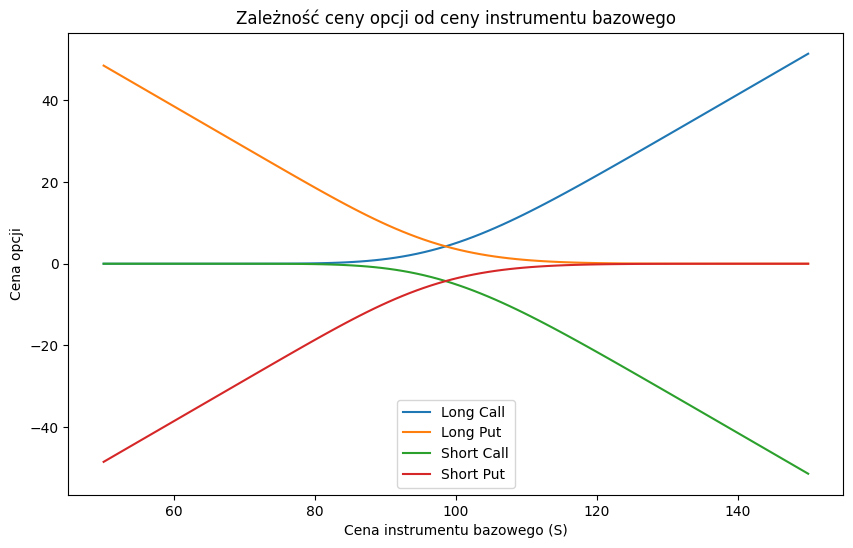

In [60]:
S_range = np.linspace(50, 150, 100)

plt.figure(figsize=(10, 6))

plt.plot(S_range, call_option_price(S_range, K, r, T, sigma), label='Long Call')
plt.plot(S_range, put_option_price(S_range, K, r, T, sigma), label='Long Put')
plt.plot(S_range, -call_option_price(S_range, K, r, T, sigma), label='Short Call')
plt.plot(S_range, -put_option_price(S_range, K, r, T, sigma), label='Short Put')

plt.title('Zależność ceny opcji od ceny instrumentu bazowego')
plt.xlabel('Cena instrumentu bazowego (S)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/EU/a.png')
plt.show()


b) ceny wykonania opcji

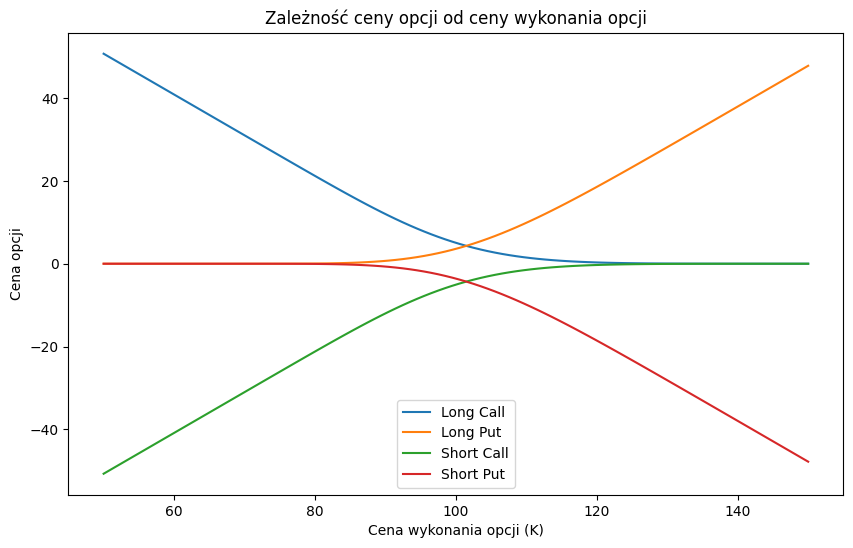

In [61]:
K_range = np.linspace(50, 150, 100)

plt.figure(figsize=(10, 6))

plt.plot(K_range, call_option_price(S, K_range, r, T, sigma), label='Long Call')
plt.plot(K_range, put_option_price(S, K_range, r, T, sigma), label='Long Put')
plt.plot(K_range, -call_option_price(S, K_range, r, T, sigma), label='Short Call')
plt.plot(K_range, -put_option_price(S, K_range, r, T, sigma), label='Short Put')

plt.title('Zależność ceny opcji od ceny wykonania opcji')
plt.xlabel('Cena wykonania opcji (K)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/EU/b.png')
plt.show()


c) stopy dywidendy

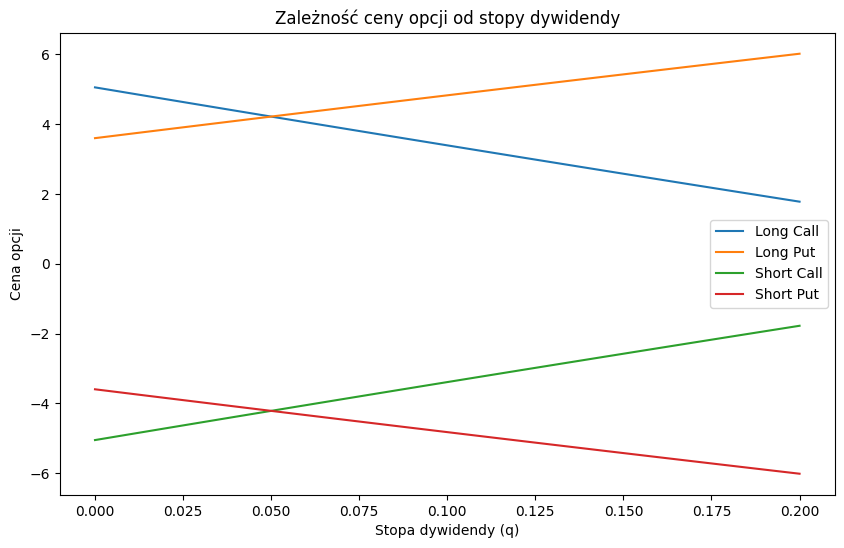

In [62]:
q_range = np.linspace(0, 0.2, 100)

plt.figure(figsize=(10, 6))

plt.plot(q_range, call_option_price(S, K, r, T, sigma, q_range), label='Long Call')
plt.plot(q_range, put_option_price(S, K, r, T, sigma, q_range), label='Long Put')
plt.plot(q_range, -call_option_price(S, K, r, T, sigma, q_range), label='Short Call')
plt.plot(q_range, -put_option_price(S, K, r, T, sigma, q_range), label='Short Put')

plt.title('Zależność ceny opcji od stopy dywidendy')
plt.xlabel('Stopa dywidendy (q)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/EU/c.png')
plt.show()


d) stopy wolnej od ryzyka

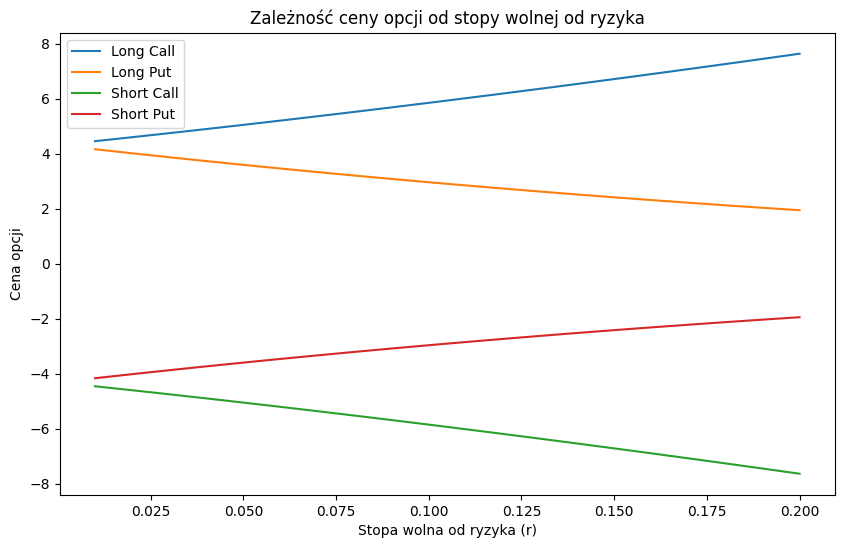

In [63]:
r_range = np.linspace(0.01, 0.2, 100)

plt.figure(figsize=(10, 6))

plt.plot(r_range, call_option_price(S, K, r_range, T, sigma), label='Long Call')
plt.plot(r_range, put_option_price(S, K, r_range, T, sigma), label='Long Put')
plt.plot(r_range, -call_option_price(S, K, r_range, T, sigma), label='Short Call')
plt.plot(r_range, -put_option_price(S, K, r_range, T, sigma), label='Short Put')

plt.title('Zależność ceny opcji od stopy wolnej od ryzyka')
plt.xlabel('Stopa wolna od ryzyka (r)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/EU/d.png')
plt.show()


e) terminu zapadalności

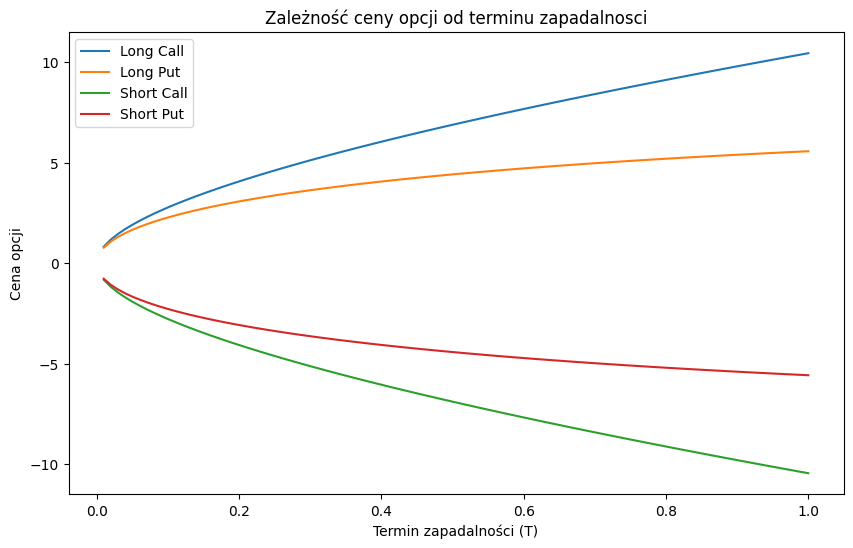

In [64]:
T_range = np.linspace(0.01, 1, 100)

plt.figure(figsize=(10, 6))

plt.plot(T_range, call_option_price(S, K, r, T_range, sigma), label='Long Call')
plt.plot(T_range, put_option_price(S, K, r, T_range, sigma), label='Long Put')
plt.plot(T_range, -call_option_price(S, K, r, T_range, sigma), label='Short Call')
plt.plot(T_range, -put_option_price(S, K, r, T_range, sigma), label='Short Put')

plt.title('Zależność ceny opcji od terminu zapadalnosci')
plt.xlabel('Termin zapadalności (T)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/EU/e.png')
plt.show()


f) zmienności intrumentu bazowego

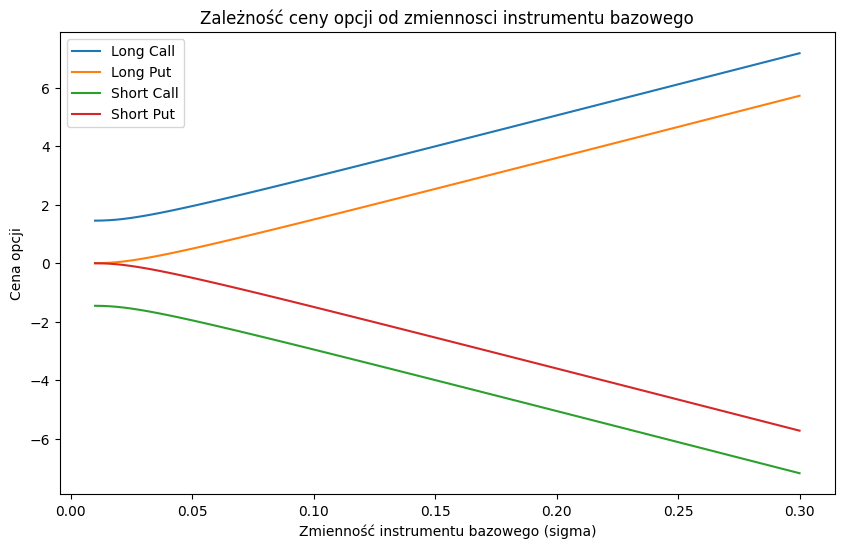

In [65]:
sigma_range = np.linspace(0.01, 0.3, 100)

plt.figure(figsize=(10, 6))

plt.plot(sigma_range, call_option_price(S, K, r, T, sigma_range), label='Long Call')
plt.plot(sigma_range, put_option_price(S, K, r, T, sigma_range), label='Long Put')
plt.plot(sigma_range, -call_option_price(S, K, r, T, sigma_range), label='Short Call')
plt.plot(sigma_range, -put_option_price(S, K, r, T, sigma_range), label='Short Put')

plt.title('Zależność ceny opcji od zmiennosci instrumentu bazowego')
plt.xlabel('Zmienność instrumentu bazowego (sigma)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/EU/f.png')
plt.show()


Ponadto, proszę wykonać wykres funkcji wypłaty opcji w zależności od ceny wykonania opcji i ceny instrumentu bazowego.

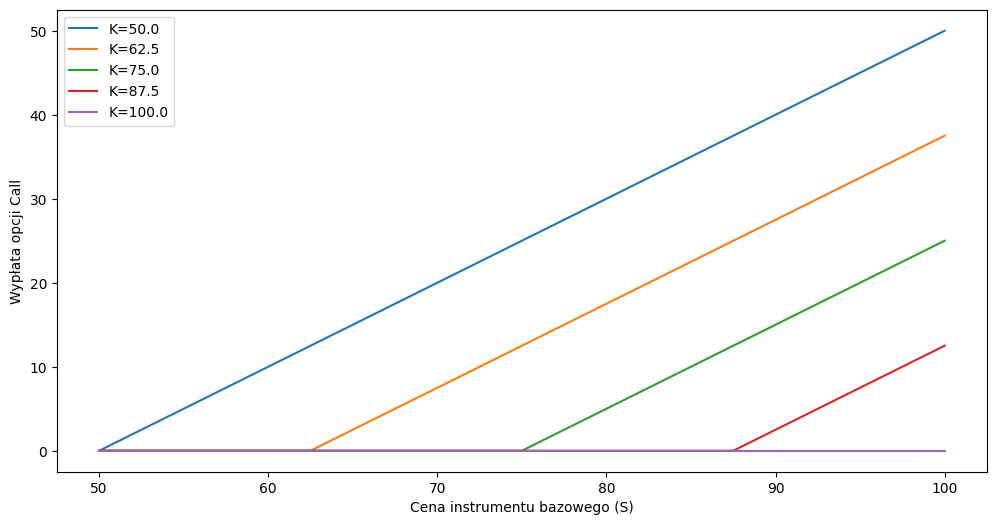

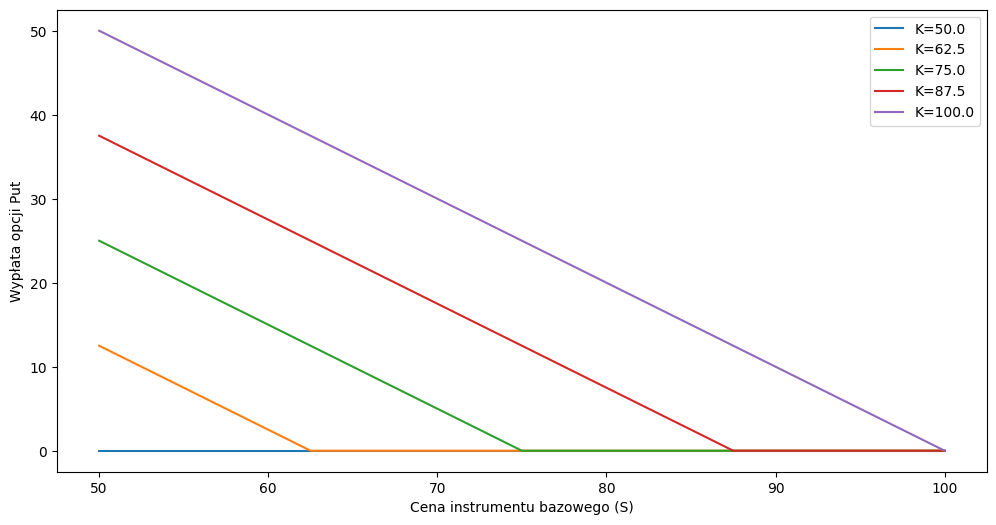

In [66]:
S_range = np.linspace(50, 100, 5)  
K_range = np.linspace(50, 100, 5) 

call_payoff = np.zeros((len(K_range), len(S_range)))
for i, K in enumerate(K_range):
    call_payoff[i, :] = call_option_payoff(S_range, K)

put_payoff = np.zeros((len(K_range), len(S_range)))
for i, K in enumerate(K_range):
    put_payoff[i, :] = put_option_payoff(S_range, K)

# Call
plt.figure(figsize=(12, 6))
for i, K in enumerate(K_range):
    plt.plot(S_range, call_payoff[i, :], label=f'K={K}')

plt.xlabel('Cena instrumentu bazowego (S)')
plt.ylabel('Wypłata opcji Call')
plt.legend()
plt.savefig('./images/EU/w_call.png')
plt.show()

# Put
plt.figure(figsize=(12, 6))
for i, K in enumerate(K_range):
    plt.plot(S_range, put_payoff[i, :], label=f'K={K}')

plt.xlabel('Cena instrumentu bazowego (S)')
plt.ylabel('Wypłata opcji Put')
plt.legend()
plt.savefig('./images/EU/w_put.png')
plt.show()
